In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'classifier.pkl', 'heart.csv', 'Heart_Disease _Classification_ECX_1.html', 'Heart_Disease _Classification_ECX_1.ipynb']


In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])
    

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [12]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


# EDA

## Target

1    165
0    138
Name: target, dtype: int64


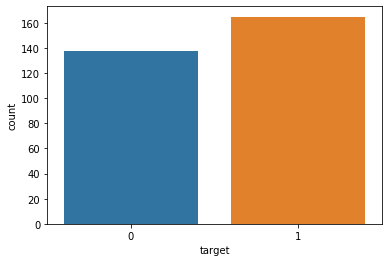

In [13]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [14]:
print("Percentage of Patience without Heart Problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of Patience with Heart Problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of Patience without Heart Problems: 45.54
Percentage of Patience with Heart Problems: 54.46


## Sex

In [15]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

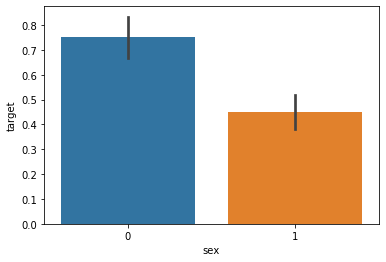

In [16]:
sns.barplot(dataset["sex"],y)

## Chest Pain

In [17]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

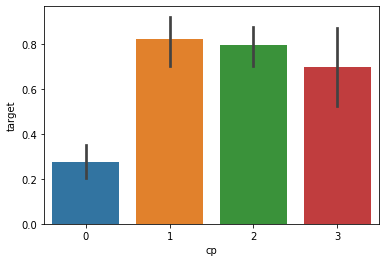

In [18]:
sns.barplot(dataset["cp"],y)

## Fasting Blood Sugar

In [19]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

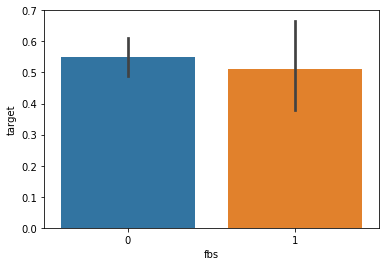

In [20]:
sns.barplot(dataset["fbs"],y)

## Resting Electrocardiographic Results

In [21]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

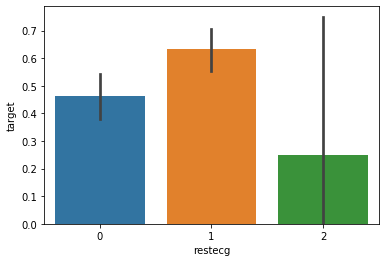

In [22]:
sns.barplot(dataset["restecg"],y)

## Exercise Induced Angina

In [23]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

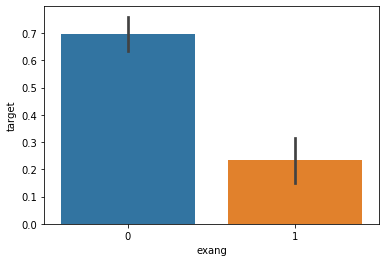

In [24]:
sns.barplot(dataset["exang"],y)

## Slope

In [25]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

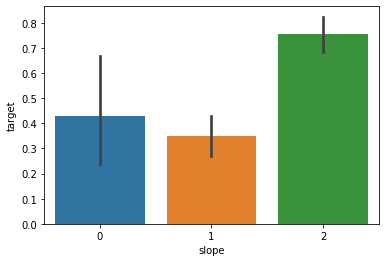

In [26]:
sns.barplot(dataset["slope"],y)

## Number Of Major Vessels Colored By Flourosopy

In [27]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

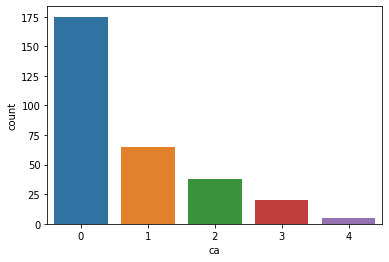

In [28]:
sns.countplot(dataset["ca"])

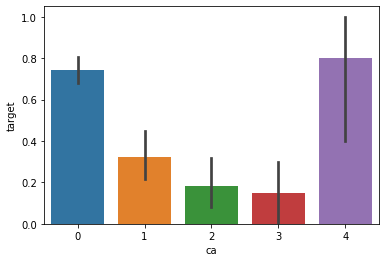

In [29]:
sns.barplot(dataset["ca"],y)

##  thal

In [30]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

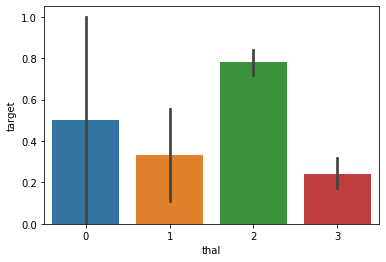

In [31]:
sns.barplot(dataset["thal"],y)

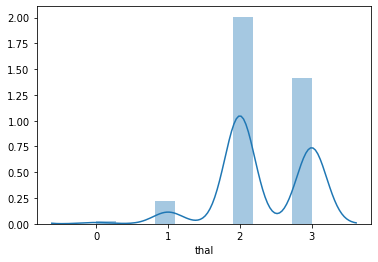

In [32]:
sns.distplot(dataset["thal"])

# Train Test Split 

In [33]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.25,random_state=0)

In [34]:
X_train.shape

(227, 13)

In [35]:
X_test.shape

(76, 13)

In [36]:
Y_train.shape

(227,)

In [37]:
Y_test.shape

(76,)

#  Model Fitting

In [38]:
from sklearn.metrics import accuracy_score

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

89.47
937


In [40]:
Y_pred_rf.shape

(76,)

In [41]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 89.47 %


In [42]:
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 89.47 %


In [43]:
import pickle
pickle_out = open("rf.pkl","wb")
pickle.dump(rf, pickle_out)
pickle_out.close()

## Report

### I've used a Machine Learning algorithm, implemented in Python, to predict the presence of heart disease in a patient. This is a classification problem, with input features as a variety of parameters, and the target variable as a binary variable, predicting whether heart disease is present or not.
#### 1. We have no missing values in the dataset.
#### 2. This is a classification problem, with the 'target' variable having values '0' and '1.
#### 3. We find that most columns are moderately correlated with target, but 'Fasting Blood Sugar(fbs)' is very weakly correlated.
#### 4. Exploratory Data Analysis (EDA) is performed:
#####    i) 'Target '---->Percentage of patient with heart problems are more compared to patient without heart problem.
#####    ii) 'Sex'   ---->We find that females are more likely to have heart problems than males.
#####   iii)'Chest Pain Type(cp)'-->Chest pain types are  1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic we find that  the ones with typical angina are much less likely to have heart problems.
##### iv)'Fasting Blood Sugar(fbs)'-->we find nothing extraordinary.          
##### v)'Resting Electrocardiographic Results(restecg)'--> We find that people with restecg '1' and '0' are much more likely to have a heart disease                   than with restecg '2'.            
##### vi)'Exercise Induced Angina(exang)'-->We find that people with exang=1 are much less likely to have heart problems.   
##### vii)'(Slope) The slope of the peak exercise ST segment'-->We find that Slope '2' causes heart pain much more than Slope '1' and '0'
##### viii)'number of major vessels (0-3) colored by flourosopy(ca)'-->We find that ca=4 has astonishingly large number of heart patients.                                                                                                                                                                                                                       
#### 5. Train Test Split -->Split the dataset into 75% train and 25% test. 
#### 6. Model Fitting    -->Random Forest Classifier -->an ensemble learning method for classification .
#### 7. Final Result      -->The accuracy score achieved using Random Forest is: 90.16 % 